# SHAP behaviours 

 99%|===================| 48321/48960 [01:05<00:00]        

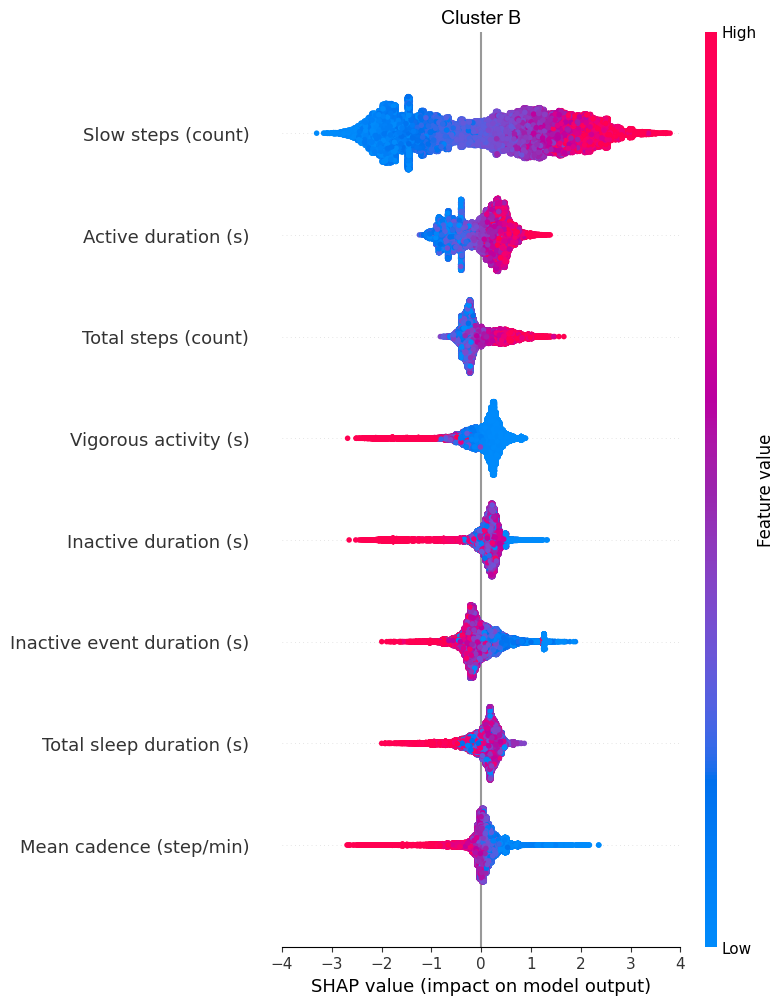

 99%|===================| 48269/48960 [01:04<00:00]        

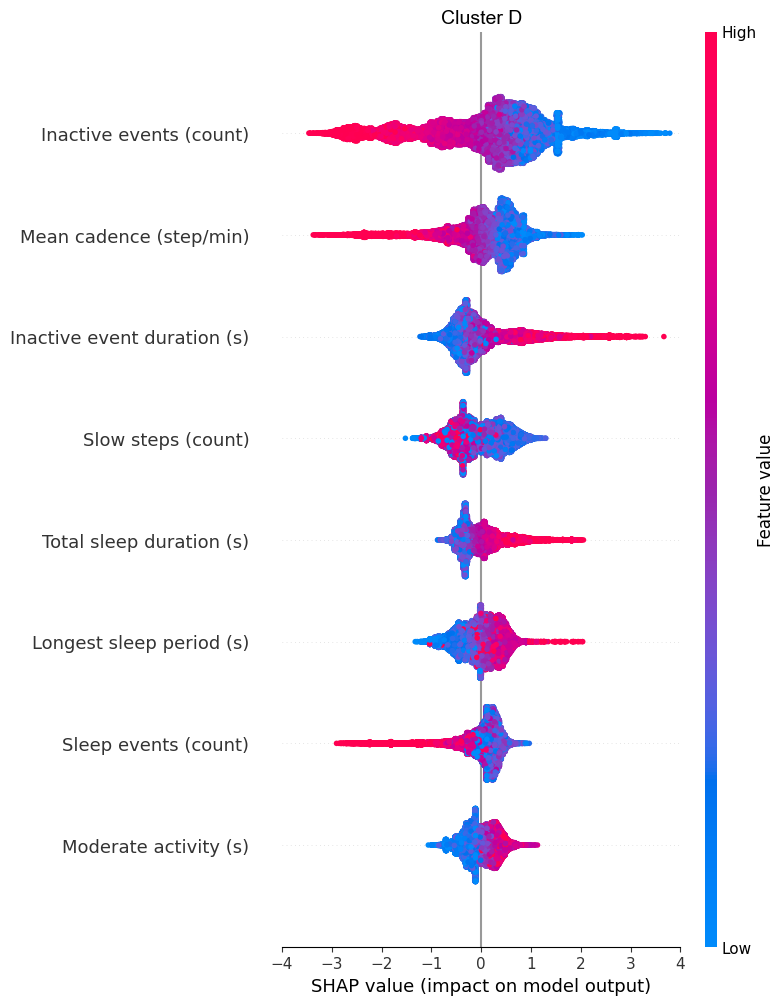

 99%|===================| 48488/48960 [01:03<00:00]        

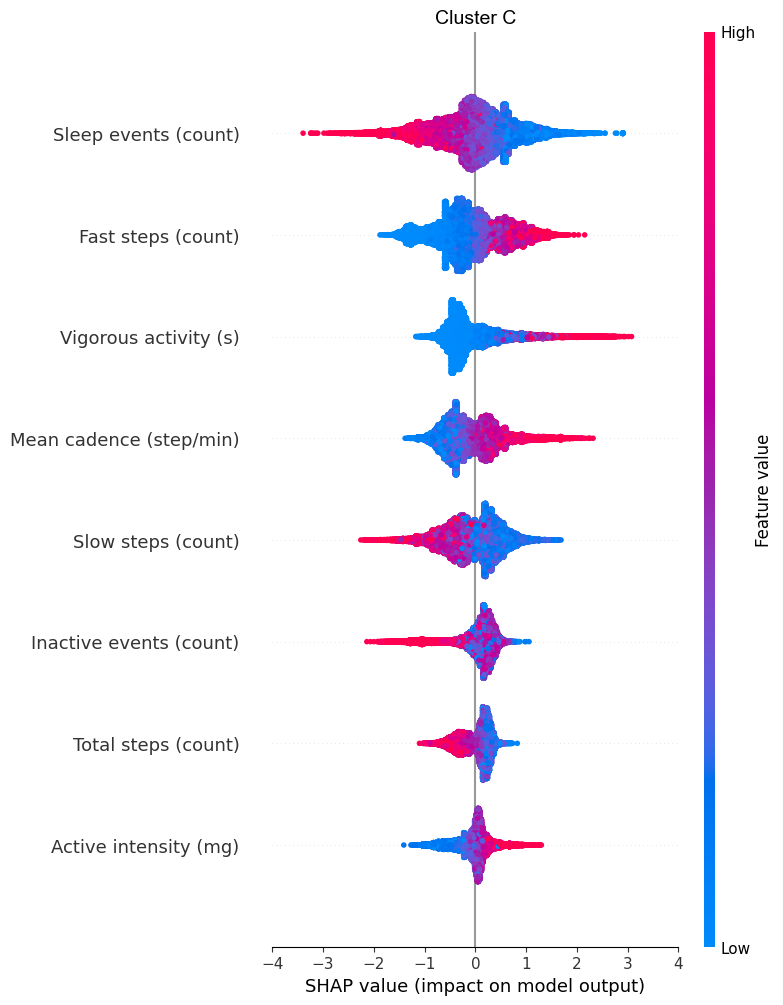

 99%|===================| 48397/48960 [01:04<00:00]        

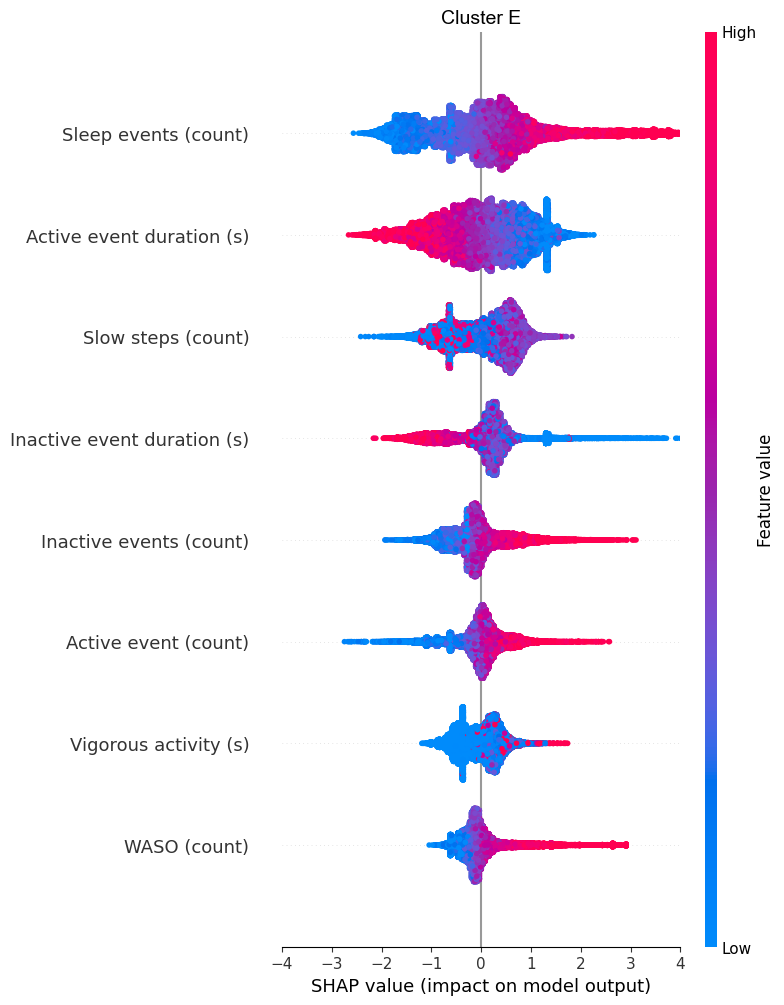

 99%|===================| 48421/48960 [01:01<00:00]        

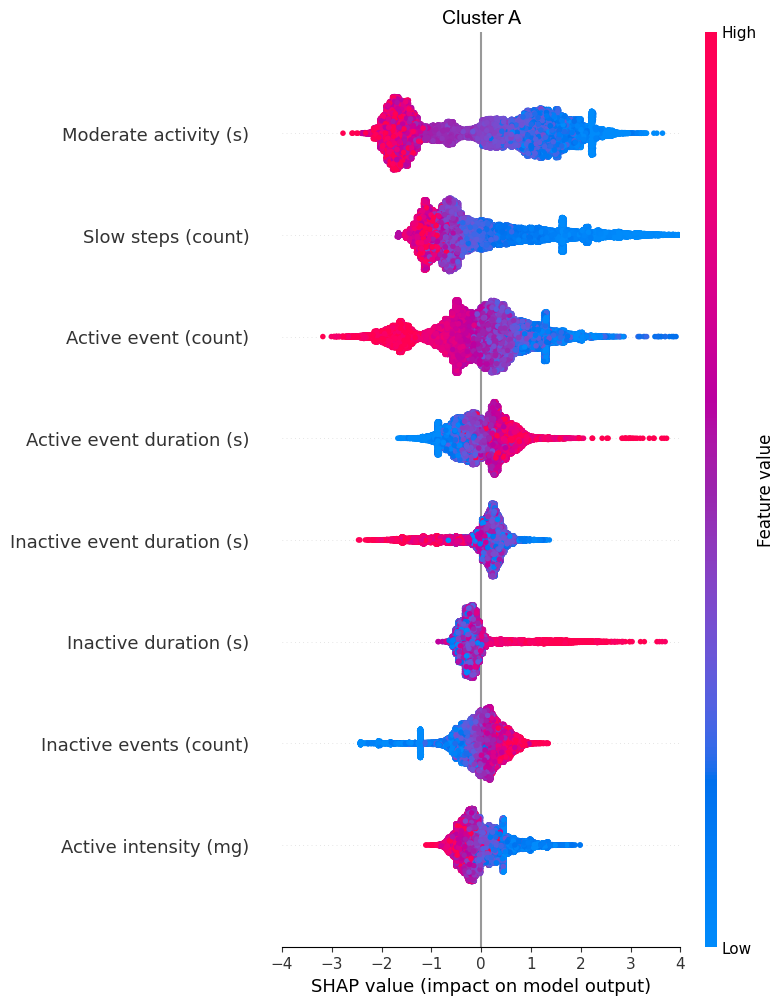

In [970]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

behaviours = df

X = behaviours.drop('cluster', axis=1)
X.columns =act
X = np.array(X)
y = behaviours['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

def labelpicker(y_train, y_test, label=0):
    y_test = y_test.apply(lambda x: 1 if x == label else 0)
    y_train = y_train.apply(lambda x: 1 if x == label else 0)
    return y_train, y_test

letters = ['B', 'D', 'C', 'E', 'A']
for i in range(5):
    y_train_shap, y_test_shap = labelpicker(y_train, y_test, label=i)
    model = xgb.XGBClassifier(n_estimators=50, random_state=5)
    model.fit(X_train, y_train_shap)
    y_pred = model.predict(X_test)
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X, max_display=8, feature_names = (act),plot_size=1.1, show=False)
    
    plt.title(f'Cluster {letters[i]}', fontsize=14,  loc='center', fontdict={'family': 'Arial'})
    plt.subplots_adjust(top=0.95) 
    ax = plt.gca()
    ax.set_xlim(-4, 4) 
    plt.show()


# Multiclass

In [1005]:
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

behaviours = df

X = behaviours.drop('cluster', axis=1)
X.columns =act
X = np.array(X)
y = pd.DataFrame(behaviours['cluster'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14, stratify=y)
model = xgb.XGBClassifier(random_state=5)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)

auc_scores = []
for i in range(model.classes_.shape[0]):
    y_true_i = (y_test == model.classes_[i]).astype(int)
    y_proba_i = y_proba[:, i]
    auc_i = roc_auc_score(y_true_i, y_proba_i)
    auc_scores.append(auc_i)
mean_auc = np.mean(auc_scores)
for i in range(model.classes_.shape[0]):
    print(f'Class {model.classes_[i]} AUROC: {auc_scores[i]}')
print(f'Mean AUROC: {mean_auc}')

Class 0 AUROC: 0.9876198819176452
Class 1 AUROC: 0.9874241759841316
Class 2 AUROC: 0.9838882028615622
Class 3 AUROC: 0.9950151516442445
Class 4 AUROC: 0.9945944441013769
Mean AUROC: 0.989708371301792


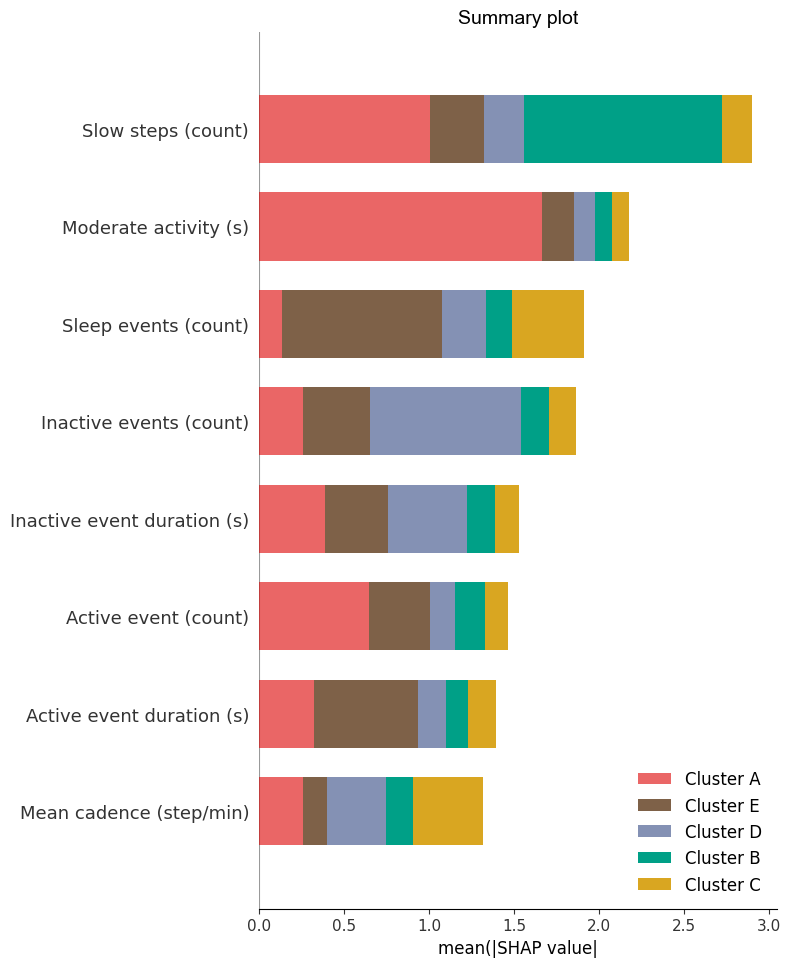

In [980]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

behaviours = df
X = behaviours.drop('cluster', axis=1)
X.columns =act
X = np.array(X)
y = behaviours['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
letters = ['Cluster B', 'Cluster D', 'Cluster C', 'Cluster E', 'Cluster A']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)
model = xgb.XGBClassifier(random_state=5)
model.fit(X_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)


def create_nature_palette():
    # Define colors inspired by nature
    colors = [
        '#DC000099',  # Red
        '#7E6148FF',  # Brown
        '#8491B4FF',  # Blue
        '#00A087FF',  # Green
        (0.85, 0.65, 0.13),  # Yellow

    ]
    cmap_name = 'nature_palette'
    nature_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))
    return nature_cmap

nature_palette = create_nature_palette()
shap.summary_plot(shap_values, X_test, feature_names=act, class_names=letters, plot_size=1.05, 
                  max_display=8, color=nature_palette, show=False)
plt.subplots_adjust(top=0.95) 
ax = plt.gca()
ax.set_xlabel('mean(|SHAP value|', fontsize=12)
ax.set_title('Summary plot', fontsize=14, loc='center', fontdict={'family': 'Arial'})
plt.show()